# Optical Character Recognition (OCR)   
An introduction to Convolutional Neural Networks (CNNs)  
<font size="1"> This document is intended as teaching material for a course with a coach. (There are probably not enough comments for self-study).</font> 

*Prerequisites:*  Basic knowledge about artificial neural nets

Images can be represented as an array where each pixel has a certain numerical value which represents the grey value or the colour. Neural networks do not handle images directly but process these numerical values.  

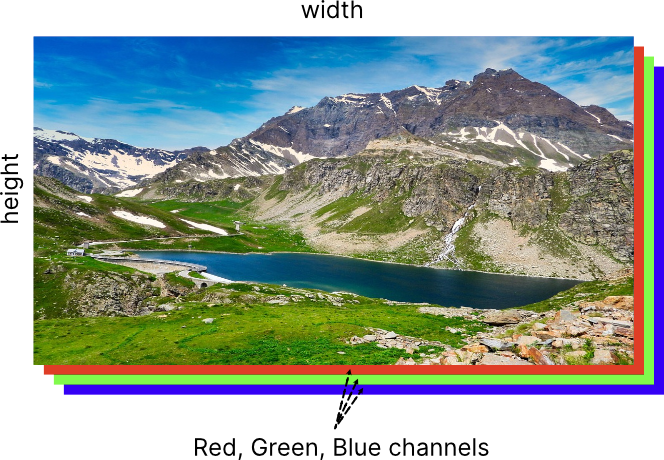

Depth is the number of channels (3 for RedGreenBlue, 1 for BlackWhite)  
Each pixel corresponds to an integer between 0 and 255 ($1 \text{ byte} = 8 \text{ bit; }2^8 = 256$).  
A 1280 x 720 px color image, e.g.,  has 1280 x 720 x 3 = 2,764,800 pixels = 2.76 MB 

Imagine if we used that amount of input features for a dense neural network... 😩

Consider this simple b/w image:  
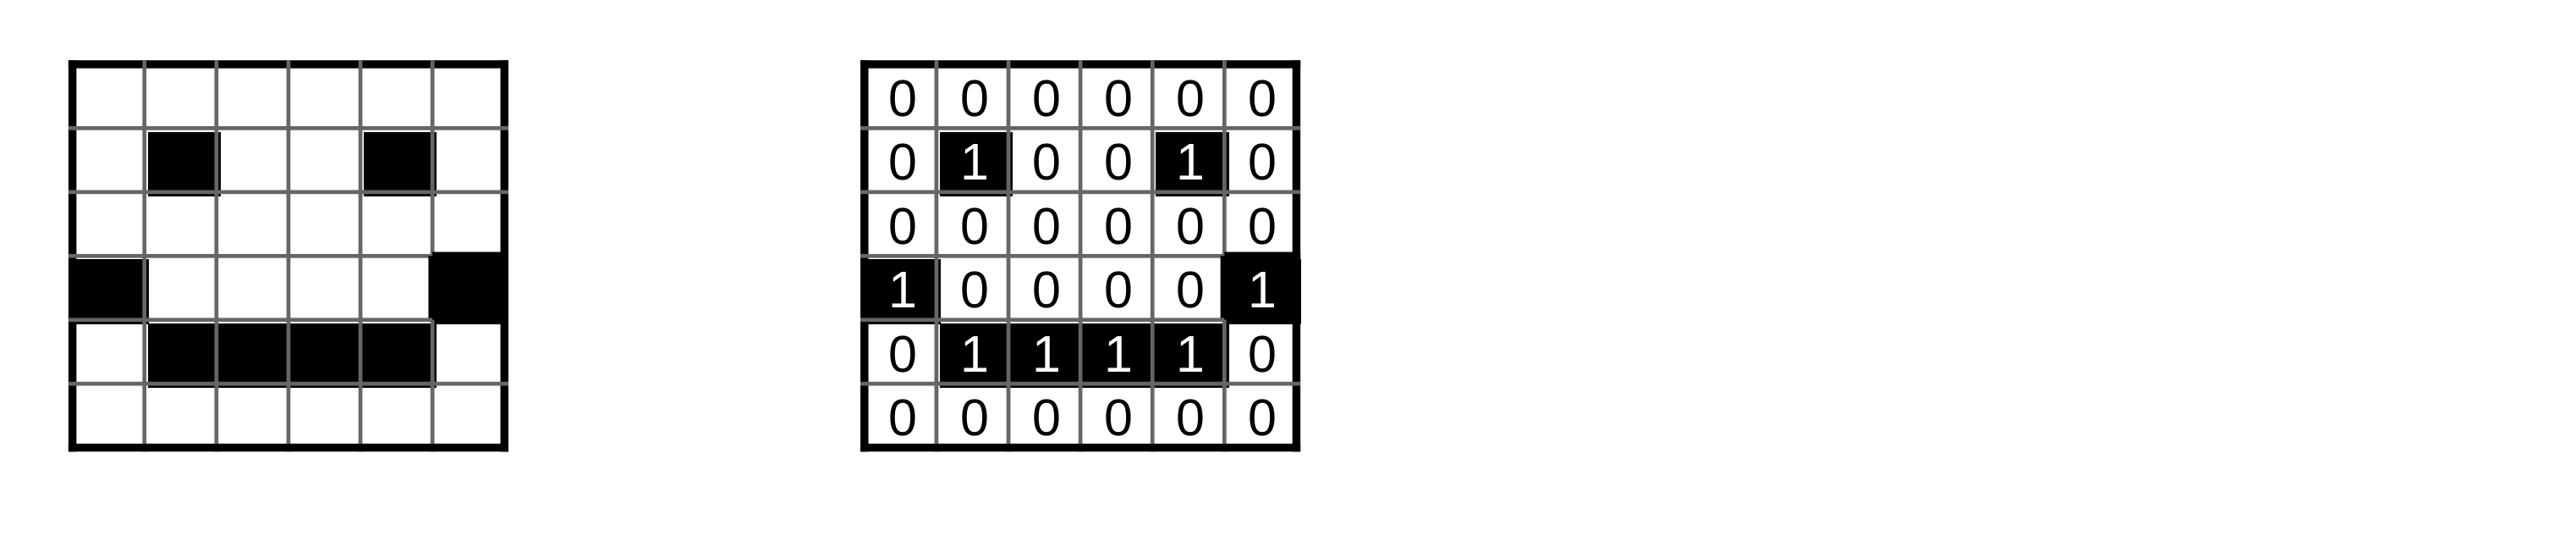

For image classification with a classical feed forward network, you would need to take your 2D image and expand it into 1D, loosing useful information about the spatial structure in our image.  

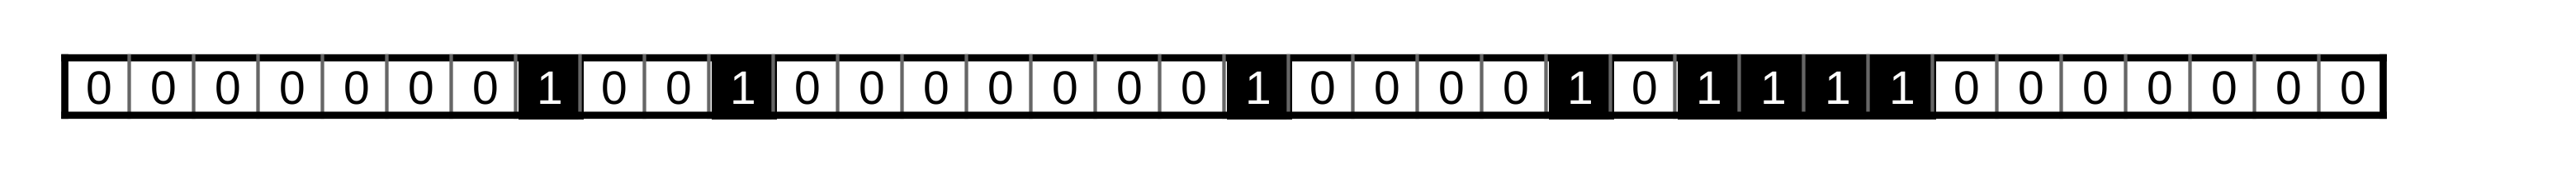

For example, the mouth corners are no longer connected to the mouth. Moreover with this approach you are going to have tons of parameters in a densely connected network, because every single pixel in our input is connected to every single neuron of the hidden layers.  

## Convolutional kernel

That's where convolutional neural networks (CNNs) come in which are particularly well suited for working with images in computer vision tasks.  

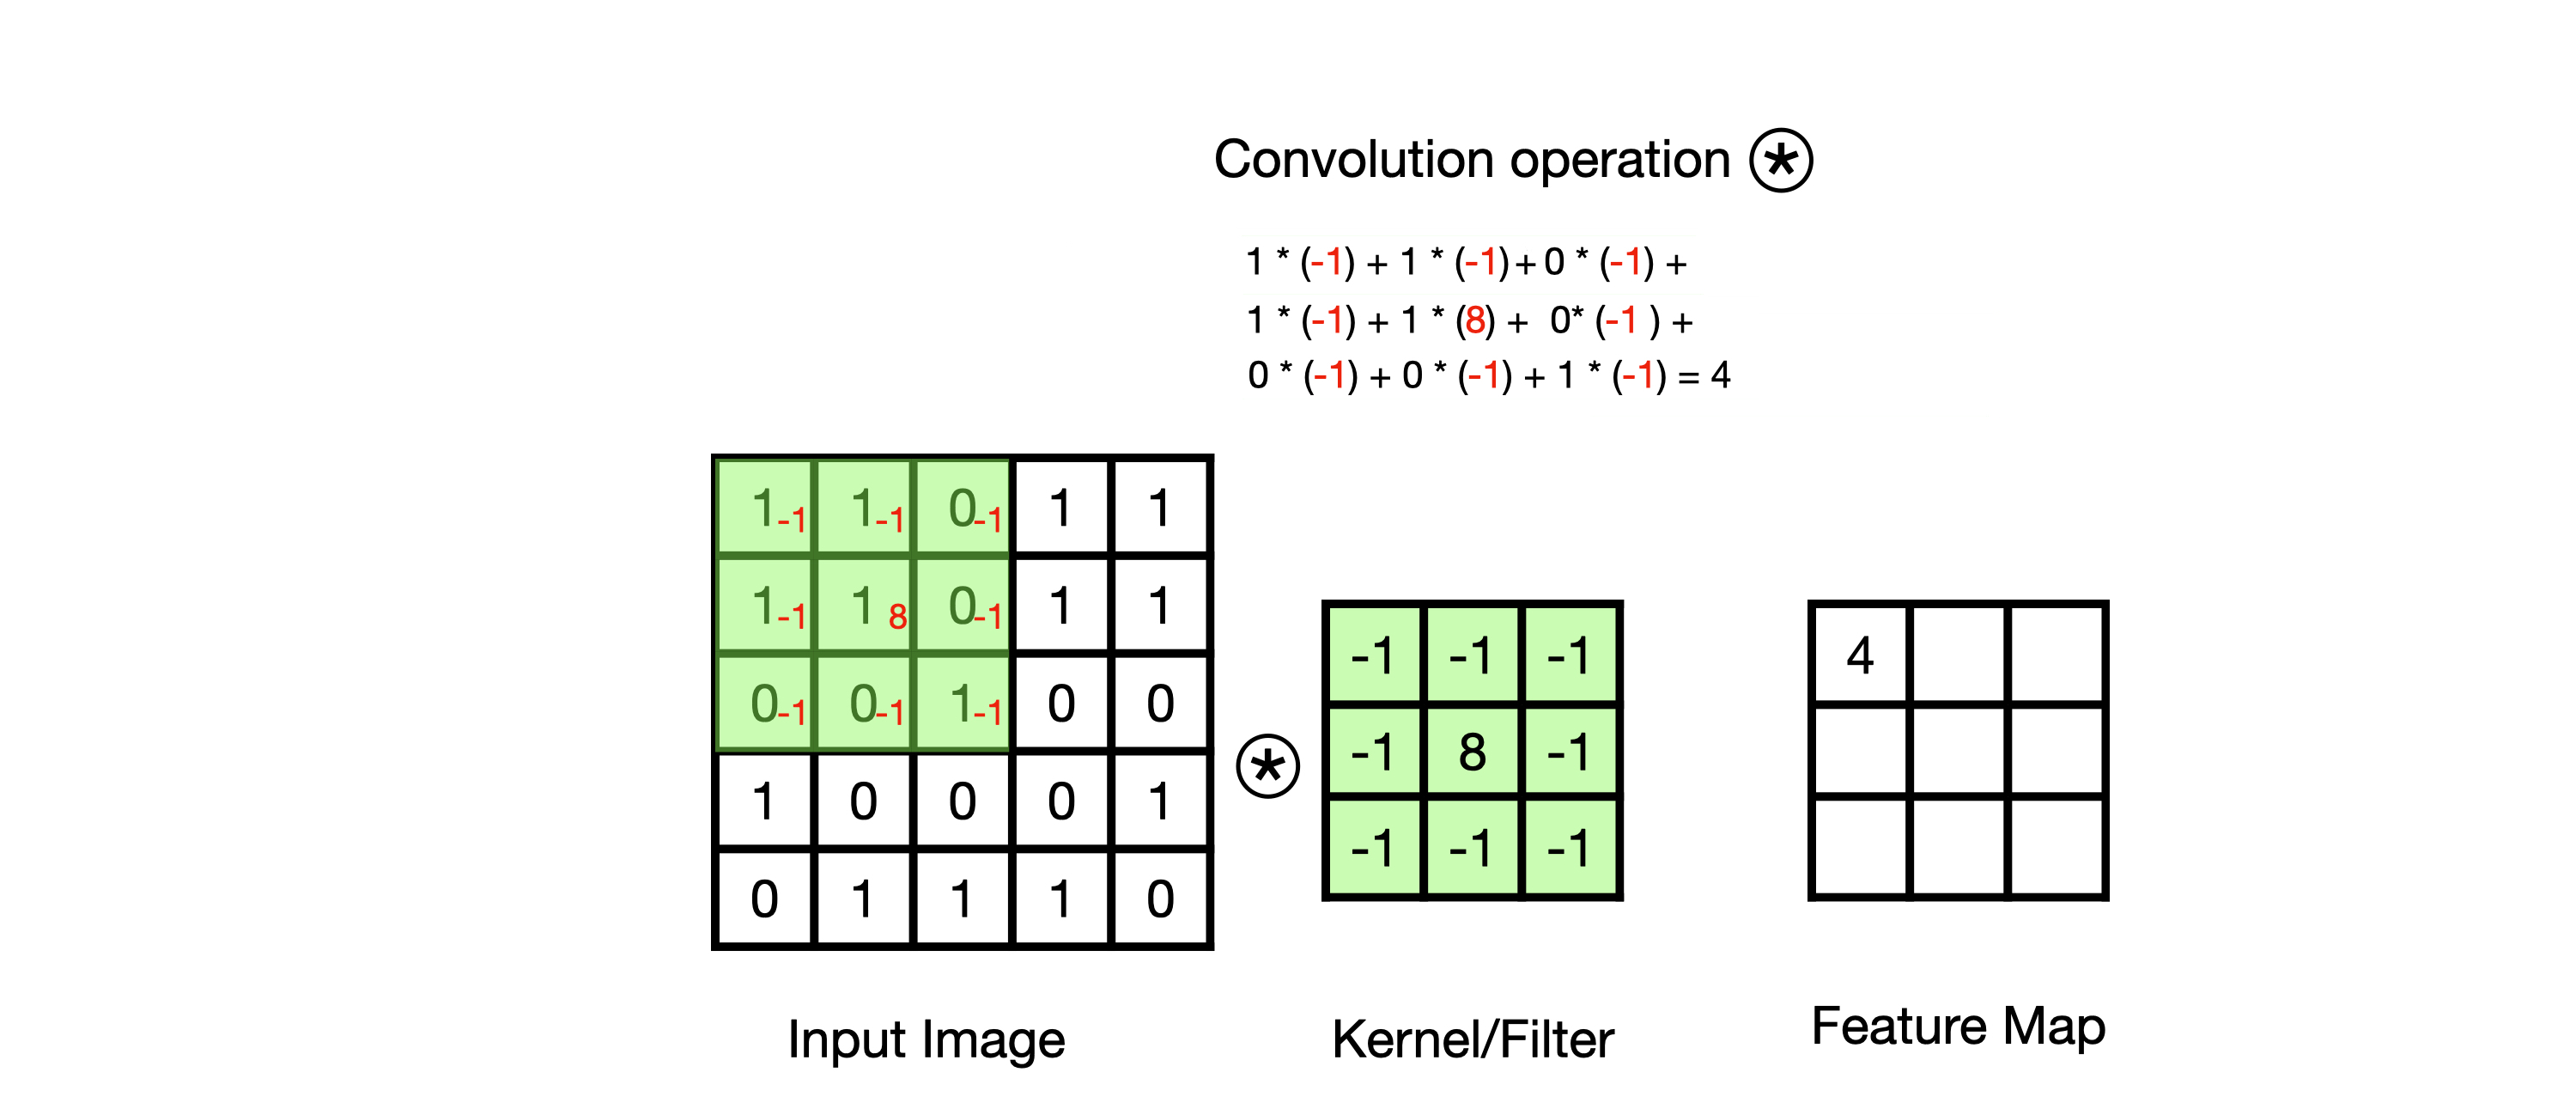

When we apply this operation to all areas of the input image:

<img src='./images/cnn_.gif' width=600>

### Bias

Additionally to the convolutional operation, a variable **bias** can be added (or subtracted) to (from) each element of the feature map.

### Padding

The kernel reduces the size of the feature space going along with loss of information. The edges are "visited" less often and might get underrepresented. To account for this, padding is used: The orginal image is surrounded by pixels containing zeros (e.g.).  

In keras there are the options ```Valid``` (= no padding) and ```Same``` (= image size retained).  

N.B.: Blue maps are inputs, and cyan maps are outputs. 


![same_padding_no_strides.gif](./images/same_padding_no_strides.gif)

### Stride

The stride value controls the step size of the kernel motion.  The animation shows a stride of (2, 2)  

N.B.: These and more animations can be found [here](https://github.com/vdumoulin/conv_arithmetic).


![padding_strides.gif](./images/padding_strides.gif)

## Pooling

Pooling is a variation of using a kernel as filter. It does not sum up the products but aggregates for example to the maximum.  
**Max Pooling** (2, 2) example:

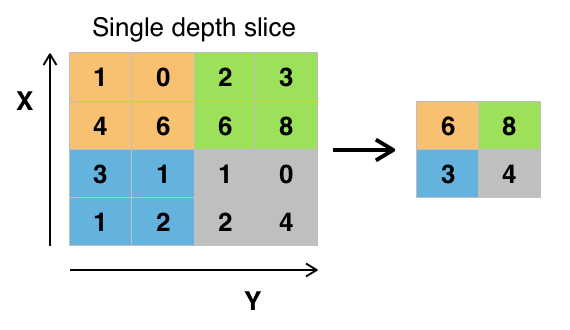

## Example of feature detection

Let's have a look how to apply the CNN process to detect the eyes of the above image.

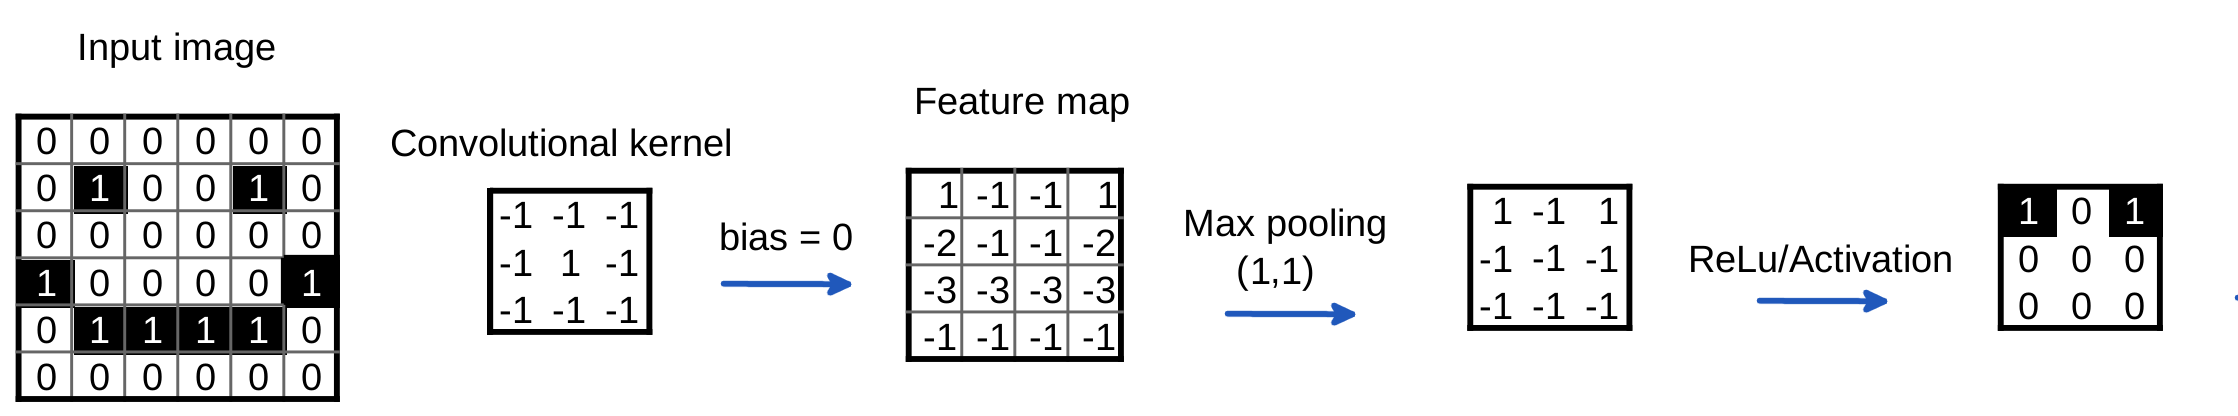

Now it's your turn.

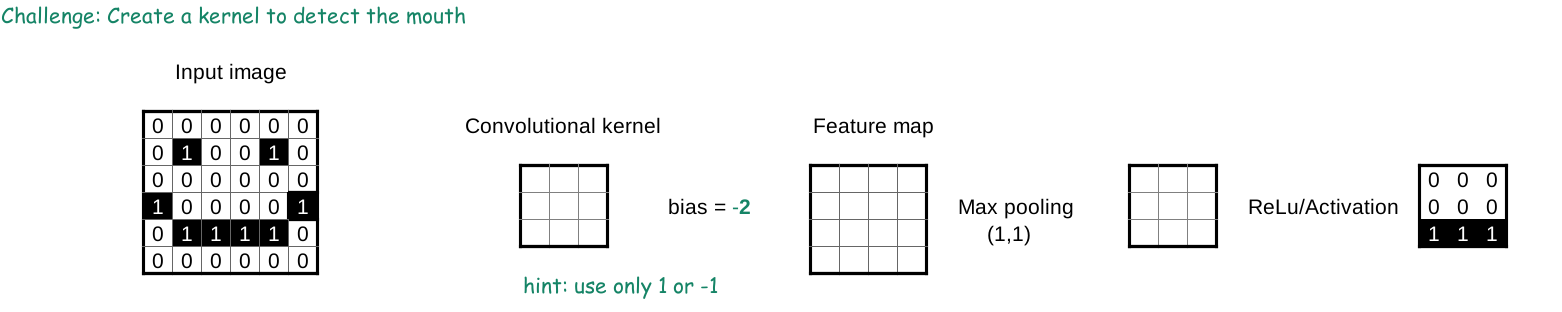

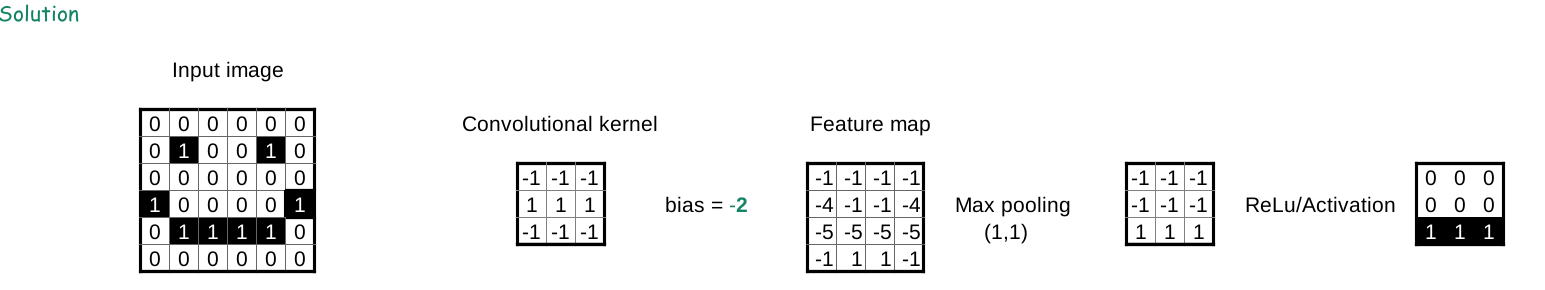

Explanation: Those black pixels get a higher vote, which are horizontally adjacent and have white neighbours above and below.

## Colour images

Colour images are composed of several base colour layers. Each of which the kernel has to be applied to. The resulting feature map is the sum of each color layer's feature map.

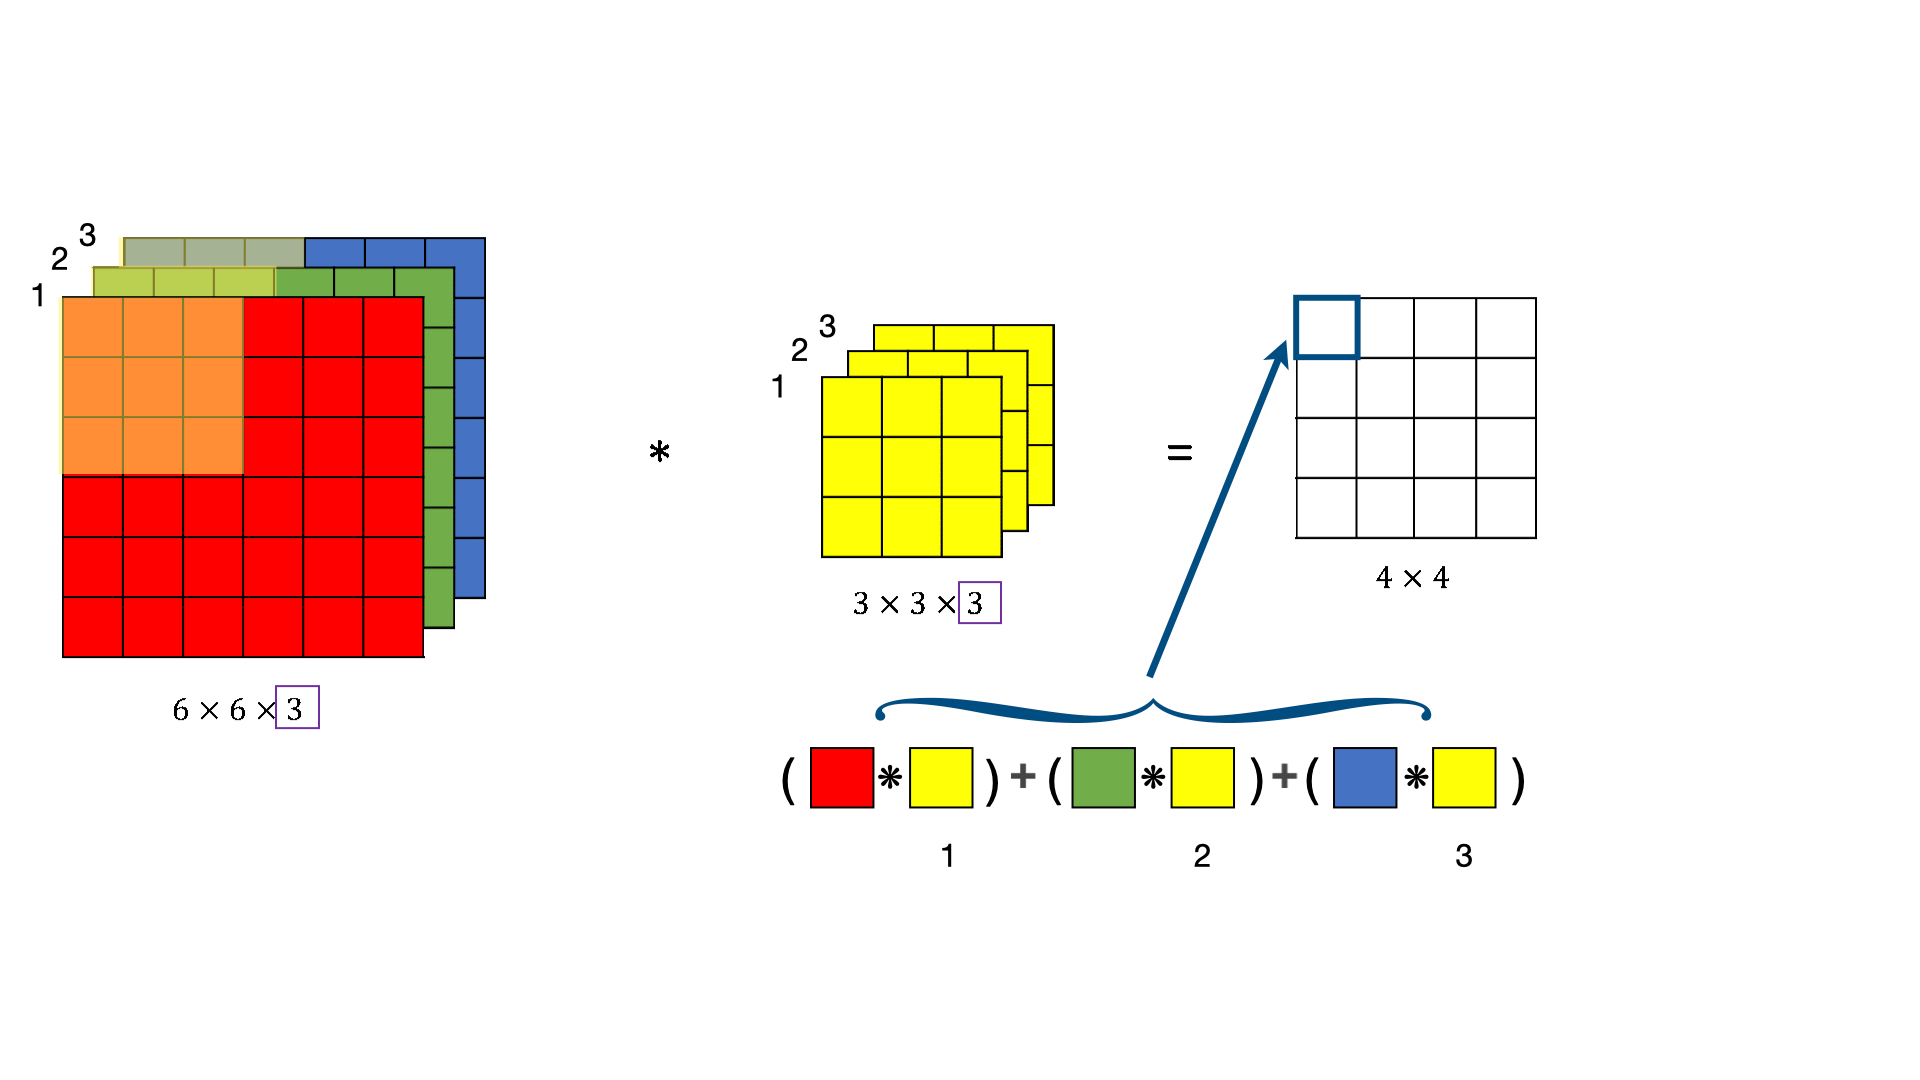

## Dimensionality considerations

**Q**: What is the size of the resulting image, if the size of the original image is `n x n` and the size of the filter is `f x f`?

**A**: `n-f+1`

**Q**: What is the size of the resulting image, if the size of the original image is `n x n`, the size of the filter is `f x f`, and we use `p` pixels of padding on each side?

**A**: `n-f+1+2p`

**Q**: What is the size of the resulting image, if the size of the original image is `n x n`, the size of the filter is `f x f`, we use padding of `p` and stride of `s`?

**A**: `(n-f+2p)/s + 1`

**Q**: What is the size if the image consists of 3 layers for red, green, and blue, RGB?

**A**: It's the same size, `(n-f+2p)/s + 1` because the 3 feature maps are summed up.

Assuming a 6 by 6 pixel RGB image to which **two** kernels (3x3) are applied, we obtain a 4x4x**2** array.  
Different layers of the kernels and feature maps are usually represented as the third dimension of a cube.

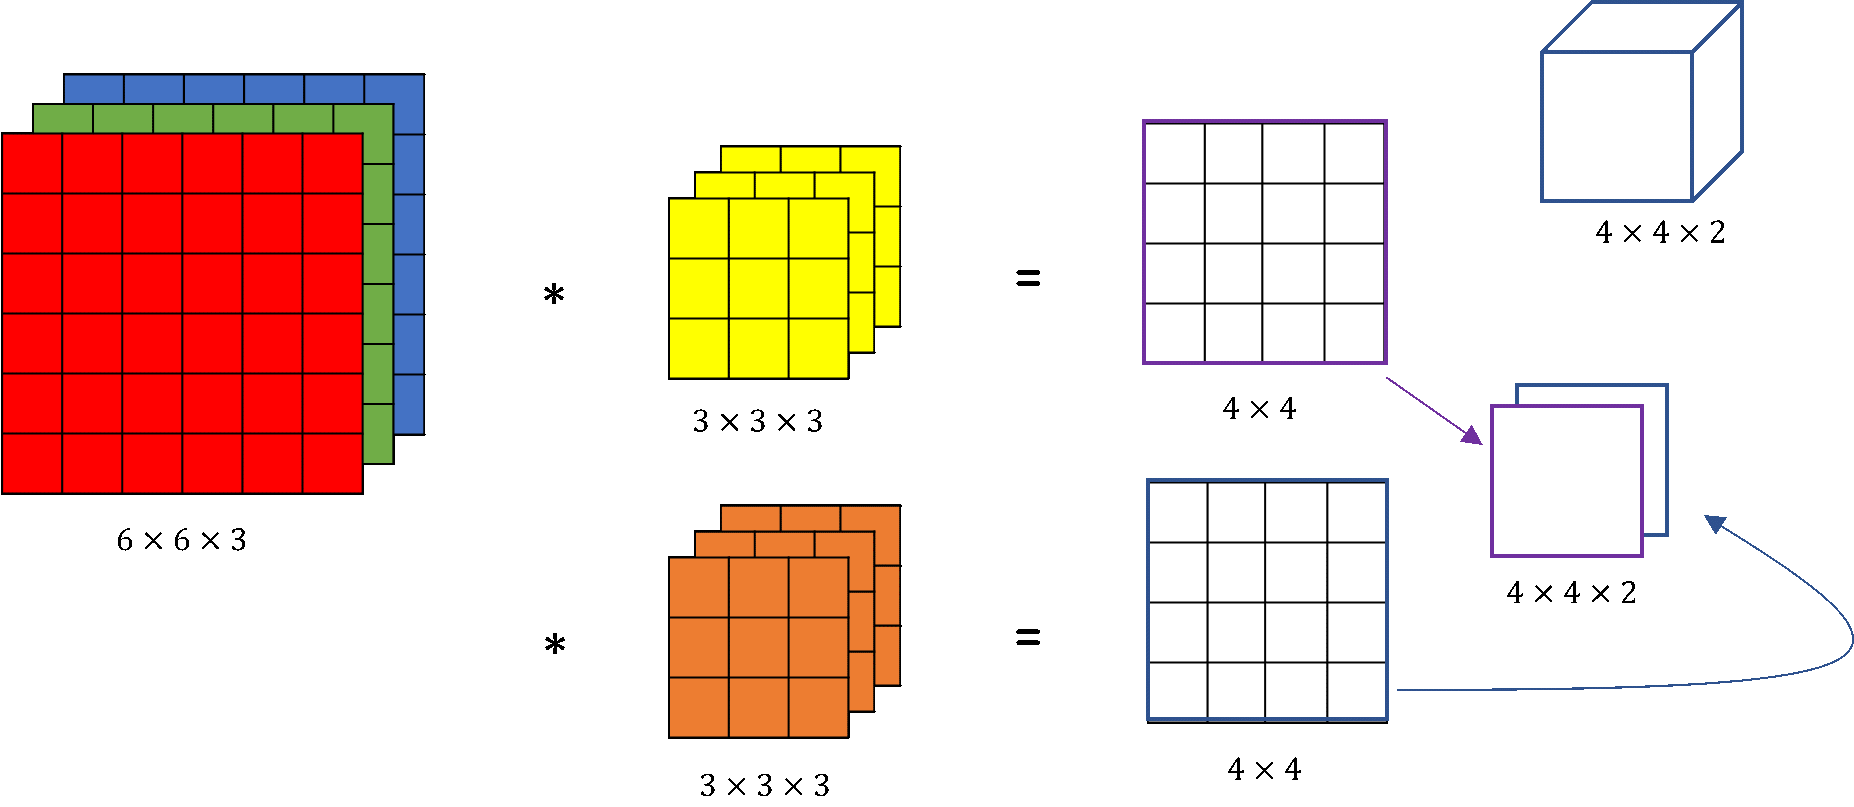

## Summary so far

---
Convolutional kernels / filters
- can have different **sizes** (e.g. 3x3, 5x5) independant of the image size
- a **bias** is added to the feature map
- downsized feature map can be avoided by **padding** 
- kernel can **stride** in different amounts (e.g. 1x1, 2x2)
- **The weights of the kernel as well as the bias are model parameters (no hyperparameters!). That means we don't have to care about them.**  

Max pooling
- pooling layer size is variable (e.g. 2x2, 3x3)
- stride as well
- small variations (shifts by a few pixels) get cancelled out
- allows for reducing the feature space

**All this serves for feature learning. The output of this phase is usually flattened and goes into a classical feed forward net.**

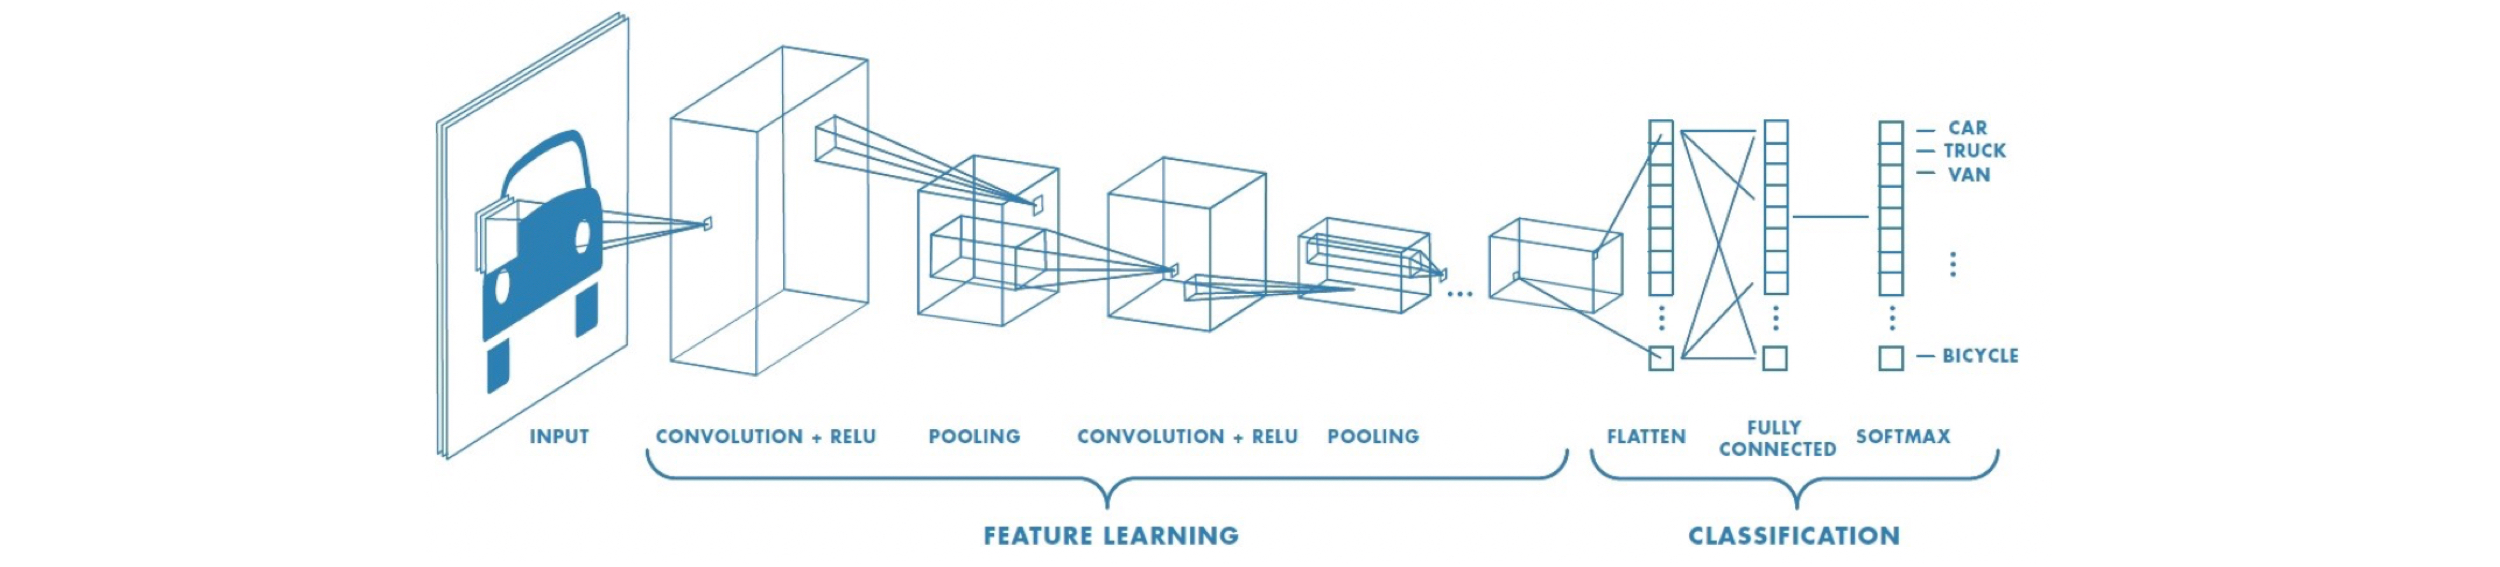

You might also want to test this [interactive link](https://adamharley.com/nn_vis/cnn/2d.html).  

---
What hyperparameters do we have apart from the classical (dense) net hyperparameters?
- kernel size
- kernel padding
- kernel stride
- pooling size, stride, kind (max, mean, ...)
- number of kernels
- activation functions
- number and squence of convolutional layer parts, layers
- ...
---
CNN in general
- don't *initially* flatten the input image
- consider the information of the pixels' spatial arrangement via kernels
- The convolutional layers right at the beginning serve for feature learning
- and thus save the amount of required conventional layers lateron  
&rightarrow; **CNNs take image features into account and save effort at the same time.**

CNN for image recognition make use of these 3 principles:  
- *Locality principle*  
    the value of a pixel in an image usually depends on its immediate surroundings.  
    i.e. images show physical &rarr; continuous objects  
- *Stationarity principle*  
    e.g. grayscale pictures have high stationarity, while a painting of Kandinsky have not. This information may simplify the learning process. Stationarity can be thought of as a kind of ‘repeatability’ of patterns. A chessboard pattern, e.g.,  has only a few repeating patterns (= high stationarity).    
- *Compositionality principle*, e.g.    
  - Layer 1: Low-Level Features: dog's shape  
  - Layer 2: Higher-Level Features: dog's head's shape  
  - Layer 3: even more higher, abstract level: dog's breed  


## Example CNN LeNet-5

The typical architecture of CNNs has a couple of convolutional layers, followed by _fully connected_ layer, i.e. feed forward NN.

In some of the most famous CNN architectures it is common to alternate convolutional and pooling layers, like this. Shown below is one of the classical CNN architecture, LeNet-5.

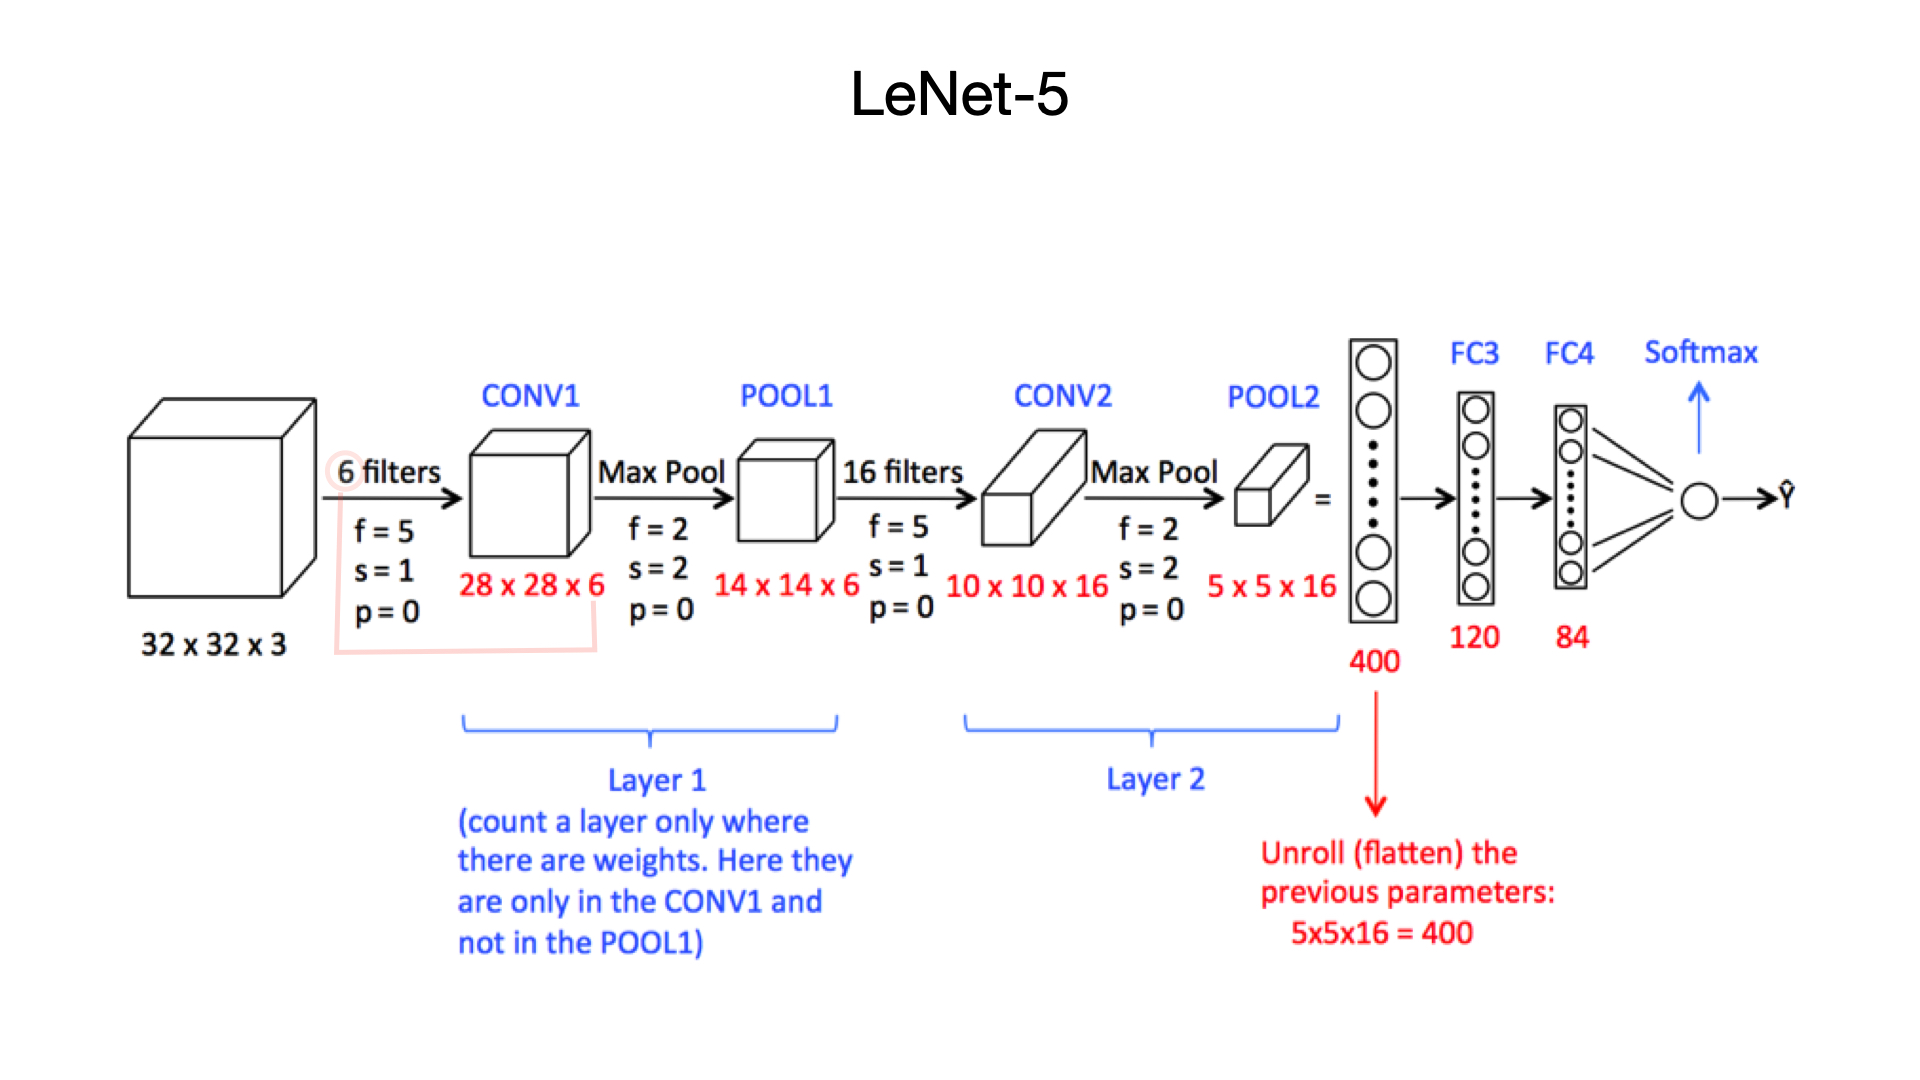

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import numpy as np

# Remember to load the virtual environment which has keras installed.

### Load and inspect the data

In [ ]:
# load the data
(Xtrain_raw, ytrain_raw), (Xtest_raw, ytest_raw) = mnist.load_data()

In [ ]:
# xtrain, xtest are the images of numbers
plt.figure(figsize=(3,3))

plt.imshow(Xtrain_raw[33], cmap="Greys_r")

In [ ]:
# ytrain, ytest are the corresponding labels
ytrain_raw[33]

In [ ]:
# How many observations are there?
# What is the image size?

Xtrain_raw.shape, Xtest_raw.shape

In [ ]:
# How does the "9" look like digitally?
Xtrain_raw[33]

In [ ]:
# What different b/w values are there?
np.unique(Xtrain_raw[33])

### Some Preprocessing

In [ ]:
# Scale from 0...255 to 0...1

Xtrain = Xtrain_raw / 255
Xtest = Xtest_raw / 255

In [ ]:
# Even though the images are monochrome, we need a "color" channel.

Xtrain = Xtrain.reshape(60000, 28, 28, 1)
Xtest = Xtest.reshape(10000, 28, 28, 1)

In [ ]:
Xtrain_raw.shape

In [ ]:
Xtrain.shape

In [ ]:
# from integer (0-9) to categorical/dummies
ytrain = to_categorical(ytrain_raw)
ytest = to_categorical(ytest_raw)

In [ ]:
ytrain[33]  # the last element refers to the 9

In [ ]:
# in case you want to revert this
np.argmax(ytrain[33])  # argmax: at which position is the maximum number (which is 1)

## Exercise: Create your own OCR tool to detect hand written digits

### 1. Define the model

Arrange in this way:
1. Convolutional layer with six 5 by 5 filters, stride should be 1, ReLu activation and no padding
2. Maxpooling to halve the dimension (what should the pool_size and the stride be in this case?)
3. Convolutional layer with 16 filters (the rest as for no. 1)
4. Maxpooling (repeat no. 2)
5. Flatten the resulting feature map (no parameters)
6. Dense layer with 120 neurons and relu activation
7. another dense with 86 neurons and relu
8. Softmax dense output layer (how many neurons should it have?)

Please look at the following documentation for the right syntax:
+ https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
+ https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
+ https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
+ https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
Xtrain[100].shape

Please fill out the missing parameters (or cheat at the solution below).

In [ ]:
K.clear_session()
model = Sequential([

    Conv2D(...),  # hint: use input_shape=Xtrain[0].shape (needed because it's the input layer)
    
    MaxPooling2D(...),
    
    
    Conv2D(...),
    
    MaxPooling2D(...),
    
    
    Flatten(),
    
    Dense(...),
    
    Dense(...),
    
    Dense(...)
    
])

In [ ]:
K.clear_session()
model = Sequential([

    Conv2D(6, kernel_size=(5,5), strides=(1,1),
           activation='relu', input_shape=Xtrain[0].shape,
           padding='valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    Conv2D(16, kernel_size=(5,5),strides=(1,1),
           activation='relu', padding='valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    Flatten(),
    
    Dense(120, activation='relu'),
    
    Dense(86, activation='relu'),
    
    Dense(10, activation='softmax')
    
])

### 2. Compile the model

In [ ]:
model.compile(optimizer='rmsprop', # type of Gradient Descent 'rmsprop'
              loss='categorical_crossentropy', # multiclass: 'categorical_crossentropy'
              metrics=['accuracy'])

In [ ]:
# print the summary
model.summary()

How do the parameter numbers calculate?  
156 = 6 kernels x 5 x 5 + 6 biases  
2416 = 16 kernels x 5 x 5 x 6 layers + 16 biases

### 3. Fit the model

**hints**
- select 10 epochs  
 (1 epoch means all observations "saw" one feed forward and backprob iteration; 10 means maximum),  
- a batch size 150  
 (don't take all observations at once but batches of 150 obs.),  
- and use 20% of the data for validation
The synatax can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).

What do we need to pass as arguments to fit()? 

In [ ]:
h = model.fit(...

*Solution:*

In [ ]:
h = model.fit(Xtrain, ytrain, epochs=10, batch_size=150, validation_split = 0.2)

### 4. Inspect the progress

In [ ]:
h.history

In [ ]:
# plot the learning curves ('loss', 'val_loss')
plt.plot(h.history['loss'],label='train')  # <-- loss for the training portion
plt.plot(h.history['val_loss'],label='validation') # <-- validation portion
#plt.ylim((0.0,2))
plt.legend();

In [ ]:
# plot the accuracy curves ('accuracy', val_accuracy)

# plot the learning curve
plt.plot(h.history['accuracy'],label='train')  # <-- accuracy for the training portion
plt.plot(h.history['val_accuracy'],label='validation') # <-- validation portion
#plt.ylim((0.0,2))
plt.legend();

### 5. Evaluate the model 

In [ ]:
model.evaluate(x=Xtest, y=ytest)  # outputs loss and accuracy for the unseen test data

What do you observe in the learning and the accuracy curves?
Do you see overfitting? If this is the case, try to use some regularization on the first two dense layers:
+ Dropout(rate) rate is the percentage of neuron that you do not want to activate during the training
(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In case you overcome the overfitting problem, you can now try to increase the hyperparameter epochs  in the `model.fit()`. Use the 
`EarlyStopping(monitor='val_loss', patience=5)` as a callback.
(https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). Remenber to set the hyperparameter callbacks in the `model.fit(...,callbacks=[callback])`



In [ ]:
# Let's see whether our image was correctly classified
model.predict(Xtrain[33].reshape(1,28,28,1))

In [ ]:
np.argmax(model.predict(Xtrain[33].reshape(1,28,28,1)))

In [ ]:
# What about the unseen test data?
ytest_pred = np.argmax(model.predict(Xtest), axis=1)

In [ ]:
# How many digits have correctly been classified?
np.sum(ytest_pred == ytest_raw)

In [ ]:
# At which indices are the wrongly predicted numbers?
np.argwhere(ytest_pred != ytest_raw)

In [ ]:
index = 740
plt.imshow(Xtest[index], cmap='Greys')

# onehotencoded = ytest[index]
# in_numbers = ytest_raw[index]
predicted = np.argmax(model.predict(Xtest[index].reshape(1,28,28,1)))

print(f'{ytest[index]} means {ytest_raw[index]}; predicted: {predicted}')

### 6. Bonus: Test model in action

Take a picture of your own hand written digit and test a real world example.  
Hint: Convert it to 28x28 first (PIL/resize, gimp, photoshop, ...)  

🥳 🥳 WELL DONE, you have just finished your first OCR with CNN. 🥳 🥳

## Outook

Challenges with convolutional neural networks

- Deep convolutional neural networks are still data hungry
 Imagine all the features it has to learn from images
- Data sparsity then is a challenge
 Could be too less, low-quality, too few variations
- Two ideas have emerged in the deep learning community to overcome these problems:  
  - Data augmentation &rarr; translate, rotate, zoom, flip, color modify, ... training images
  - Transfer learning &rarr; different notebook



## Some links

- [Dive into the math behind convolutional neural networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)  
- [Real Time CNN Visualization](https://github.com/cyberneuron/RT-CNN-Vis)  
- [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf)  
- [3D convolutional network visualization](https://adamharley.com/nn_vis/cnn/3d.html)
- [a better way than using flatten](https://stackabuse.com/dont-use-flatten-global-pooling-for-cnns-with-tensorflow-and-keras/)
- [**awesome visual explanation**](https://poloclub.github.io/cnn-explainer/)